#4.2.2 농구선수의 게임 데이터를 활용한 포지션측예측

In [ ]:
#하드 디스크로부터 파일 불러오기

#필요한 모듈(라이브러리) 임포트
import pandas as pd
from google.colab import files

#데이터 획득 (교재와 달리 구글 코랩에서 직접 입력받기)
files.upload()
df = pd.read_csv("basketball_stat.csv")

#수집된 데이터 샘플 확인
df.head() #처음 5개의 데이터만 출력

Saving basketball_stat.csv to basketball_stat (1).csv


,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [ ]:
#구글 드라이브로부터 파일 불러오기
from google.colab import drive
drive.mount('/gdrive',force_remount = True)

#구글 드라이브의 파일 불러오기 ("내 드라이브" 폴더 => /gdrive/My Drive/)
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/basketball_stat.csv")

#수집된 데이터 샘플 확인
df.head(10) #처음 10개의 데이터만 출력


Mounted at /gdrive


,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
5,Nicolas Batum,SG,1.8,3.4,6.2,5.9,1.1,0.4
6,Bradley Beal,SG,2.9,5.4,3.1,3.5,1.1,0.3
7,Marco Belinelli,SG,1.4,2.2,2.4,2.0,0.6,0.1
8,Patrick Beverley,SG,1.6,1.8,5.9,4.2,1.5,0.4
9,Bismack Biyombo,C,0.0,2.2,7.0,0.9,0.3,1.1


In [ ]:
#현재 데이터에서 " 포지션(Pos)"의 종류와 개수를 확인
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

Text(0.5, 1.0, 'AST and 2P in 2D plane')

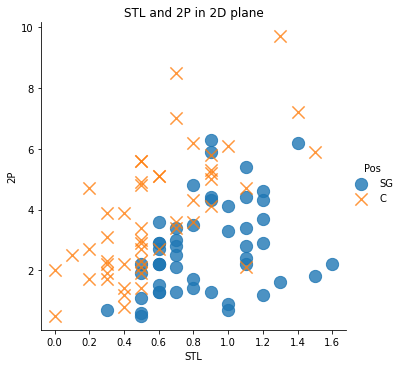

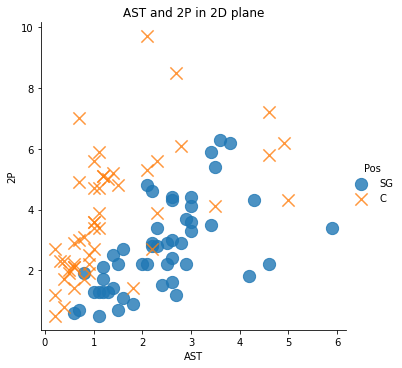

In [ ]:
#3점슛(3P),TRB(리바운드),BLK(블로킹)만 필요한 속성인 것을 입증하기 위함

#시각ㅇ화에 피룡한 모듈(라이브러리) 임포트
import matplotlib.pyplot as plt
import seaborn as sns
#브라우저 내부에 그림 그리기. 아래 라인 우측에 주석문 작성 금지(작성하면 에러발생함)
%matplotlib inline

#스틸과 2점슛 데이터 시각화 (x축과 y축 값 앞에 'x='와 'y='를 입력해야 경고메세지 안 뜸)
sns.lmplot(x = 'STL' , y='2P', data = df, fit_reg = False, #x축, y축, 데이터, 라인 X
           scatter_kws = {"s" : 150}, #좌표 상의 점의 크기(s -> Size)
           markers = ["o","x"], #Pos의 값들(SG,C)을 표시할 마커 모양
           hue = "Pos") #예측값(표시할 데이터(범례))

#타이틀
plt.title('STL and 2P in 2D plane')

#어시스트와 2점슛 데이터 시각화 -> 교재에 프로그램 없음
sns.lmplot(x = 'AST' , y='2P', data = df, fit_reg = False, #x축, y축, 데이터, 라인 X
           scatter_kws = {"s" : 150}, #좌표 상의 점의 크기(s -> Size)
           markers = ["o","x"], #Pos의 값들(SG,C)을 표시할 마커 모양
           hue = "Pos") #예측값(표시할 데이터(범례))

#타이틀
plt.title('AST and 2P in 2D plane')


Text(0.5, 1.0, 'TRB and 3P in 2D plane')

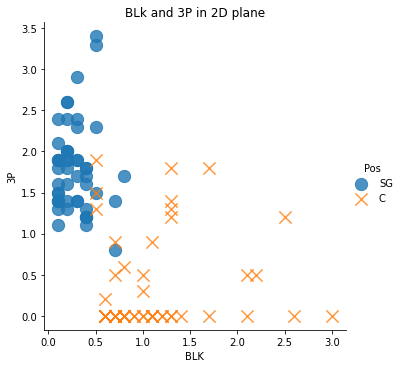

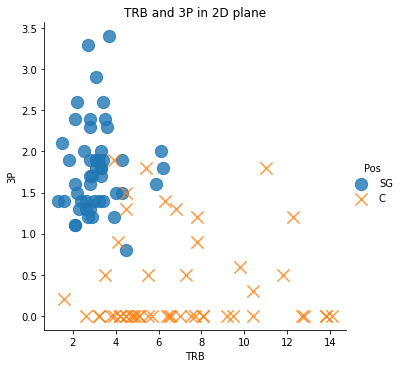

In [ ]:
#블로킹과 3점슛 데이터 시각화
sns.lmplot(x = 'BLK' , y='3P', data = df, fit_reg = False, #x축, y축, 데이터, 라인 X
           scatter_kws = {"s" : 150}, #좌표 상의 점의 크기(s -> Size)
           markers = ["o","x"], #Pos의 값들(SG,C)을 표시할 마커 모양
           hue = "Pos") #예측값(표시할 데이터(범례))

#타이틀
plt.title('BLk and 3P in 2D plane')

#리바운드와 3점슛 데이터 시각화
sns.lmplot(x = 'TRB' , y='3P', data = df, fit_reg = False, #x축, y축, 데이터, 라인 X
           scatter_kws = {"s" : 150}, #좌표 상의 점의 크기(s -> Size)
           markers = ["o","x"], #Pos의 값들(SG,C)을 표시할 마커 모양
           hue = "Pos") #예측값(표시할 데이터(범례))

#타이틀
plt.title('TRB and 3P in 2D plane')

In [ ]:
#분별력 없는 특징을 데이터에서 제거
df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True) # inplace = True : 데이터 삭제후 빈 셀 제거하기
df.head()                       #axis = 1 -> column 제거, axis = 0 -> row 제거

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [ ]:
#사이킷 런 (scikit-learn) 의 train_test_split을 사용하여 학습 데이터와 테스트
from sklearn.model_selection import train_test_split

#다듬어진 데이터에서 임의로 20%를 테스트 데이터로 분류
train, test = train_test_split(df,test_size = 0.2)
train.shape[0] #학습 데이터 수 출력

80

In [ ]:
test.shape[0] # 테스트 데이터 수 출력

20

##예측율이 가장 높은 최적 k값 찾기

In [ ]:
#사이킷런으로부터 kNN 함수 추가
from sklearn.neighbors import KNeighborsClassifier
#사이킷 런으로부터 k-폴드 교차 검증 함수 추가
from sklearn.model_selection import cross_val_score

#전체 데이터 수가 100갱 ㅣ므로 데이터의 수가 적어 "k-폴드 교차 검증"을 실행하기로 함.

#최적의 k를 찾기위해 교차 검증을 수행한 k의 범위를 3부터 함수데이터 절반까지 지정
max_k_range = train.shape[0] // 2# // -> 나누기 후 소수점 이하 버림.(주석문 아님에 주의!!)
k_list = []# 사용자 정의 리스트(즉, 배열) 생성
for i in range(3,max_k_range,2):# for(i=3; i < max_k_range; i+=2)와 동일
    k_list.append(i)# k_list에 저장되는 값 : 3, 5, 7, 9, ..., 39 -> 총 19개

x_train = train[['3P','BLK','TRB']]# 입력 데이터
y_train = train[['Pos']] # 출력 데이터(정답), 즉 레이블(label)

cross_validation_scores = []# 사용자 정의 리스트 생성
# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:# k_list에 저장된 값을 하나씩 뽑아 k에 저장한 후, for 문 반복 수행.
    knn = KNeighborsClassifier(n_neighbors = k)# kNN 모델 정의
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),cv = 10, # k(여기서는 10) 폴드 교차 검증 실행
            scoring='accuracy')  # 성능평가지표 -> 정확도 # .values : 데이터프레임에서 인덱스를 제외한 나머지 칼럼 값
                                                                            # .ravel() : y_train의 값을 1차원 배열로 만듦. 
    cross_validation_scores.append(scores.mean())  # 즉, [[SG], [C], [SG], ...]]를 [SG, C, SG, ....]로 변경
                                                             # scores에는 k번, 즉 10번 실행한 각 정확도 결과가 저장됨.
cross_validation_scores  # k-폴드 교차 검증의 최종 결과 19개 저장값 출력

[0.925,
 0.9,
 0.9125,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.825,
 0.825,
 0.8125]

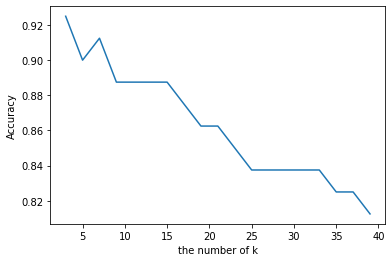

In [ ]:
#cross_validation_scores의 19개 결과 값의 시각화
plt.plot(k_list,cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("검증데이터의 정확도가 가장 큰 k값 : " + str(k))

검증데이터의 정확도가 가장 큰 k값 : 3


In [ ]:
# 사이킷런으로부터 정확도 계산하는 함수 임포트(추가)
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)# 위에서 찾은 최적 k 값으로 kNN 설정

# 학습에 사용될 속성을 지정. 위에서 이미 했기 때문에 할 필요 없음.
#x_train = train[['3P', 'BLK', 'TRB']]
# 선수 포지션을 예측할 값으로 지정. 위에서 이미 했기 때문에 할 필요 없음.
#y_train = train[['Pos']]

# knn 모델 학습 -> .fit 멤버 함수 : 실제 학습을 실행하는 명령(입력(x)과 출력 레이블(y)이 필요)
knn.fit(x_train,y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]
# 선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

# 테스트 데이터에 대해 knn 예측 -> .predict 멤버 함수 : 실제 테스트를 실행하는 명령(입력(x)만 필요)
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print("정확도 : "+str(accuracy_score(y_test.values.ravel(),pred)*100) + "%")

정확도 : 95.0%


In [ ]:
#실제값과 예측된 값 확인
comparison = pd.DataFrame({'실제값' : y_test.values.ravel(),'예측값':pred}) #교재와
comparison

,실제값,예측값
0,C,C
1,SG,SG
2,SG,SG
3,C,C
4,C,C
5,C,C
6,C,C
7,SG,SG
8,C,C
9,C,C
